# Exploring university traces some more

Here we will look at the velocity across different areas of campus and see how it changes across the campus. We will also try splitting the mobility traces into smaller pieces in order to get more samples out of our mobility data haha.


## Velocity heatmaps

In [1]:
# import libraries
import pickle
import numpy as np
import pandas as pd
from copy import deepcopy
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

In [2]:
dict_path = '../ground_truth/big_dict.pkl'
with open(dict_path, 'rb') as dict_file:
    big_dict = pickle.load(dict_file)
    
print(big_dict)

{'000':          latitude   longitude          time       seconds        x        y
10804   39.991665  116.306813  39771.567315  3.436263e+09  776.243  674.815
10805   39.991676  116.306580  39771.567373  3.436263e+09  750.380  676.036
10806   39.991678  116.306363  39771.567431  3.436263e+09  726.293  676.258
10807   39.991607  116.306208  39771.567488  3.436263e+09  709.088  668.377
10808   39.991380  116.306213  39771.567546  3.436263e+09  709.643  643.180
...           ...         ...           ...           ...      ...      ...
75805   39.992593  116.306986  39934.294549  3.450323e+09  795.446  777.823
75806   39.992530  116.307008  39934.294606  3.450323e+09  797.888  770.830
75807   39.992477  116.307018  39934.294664  3.450323e+09  798.998  764.947
75808   39.992429  116.307007  39934.294722  3.450323e+09  797.777  759.619
137379  39.994097  116.306882  39980.243495  3.454293e+09  783.902  944.767

[128 rows x 6 columns], '003':          latitude   longitude          time     

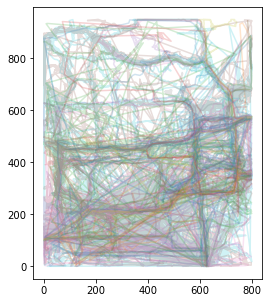

In [3]:
# print out the data really quick
plt.figure(figsize=(9, 5))
plt.gca().set_aspect("equal")
for person_id in big_dict:
    plt.plot(big_dict[person_id]["x"], big_dict[person_id]["y"], alpha=0.2)
plt.show()

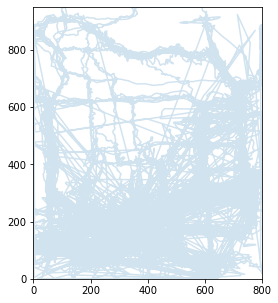

87539


In [4]:
# print out stuff for only one sensor
plt.figure(figsize=(9, 5))
plt.gca().set_aspect("equal")
plt.xlim([0, 800])
plt.ylim([0, 950])
person_id = '025'
plt.plot(big_dict[person_id]["x"], big_dict[person_id]["y"], alpha=0.2)
plt.show()
print(len(big_dict[person_id]))

In [5]:
# calculate velocities
for person_id in big_dict:
    big_dict[person_id][['dx', 'dy', 'dt', 'ds']] = big_dict[person_id].diff()[['x','y', 'time', 'seconds']]
    big_dict[person_id]['velocity'] = np.linalg.norm(big_dict[person_id][['dx', 'dy']], axis=1) / big_dict[person_id]['ds']
big_dict[person_id]

,latitude,longitude,time,seconds,x,y,dx,dy,dt,ds,velocity
18,39.990667,116.305533,39423.576968,3.406197e+09,634.20,564.00,NaN,NaN,NaN,NaN,NaN
19,39.989967,116.304850,39423.577303,3.406197e+09,558.35,486.30,-75.85,-77.70,0.000336,2.900000e+01,3.744281
20,39.989883,116.303733,39423.577662,3.406197e+09,434.40,477.05,-123.95,-9.25,0.000359,3.100000e+01,4.009505
21,39.989650,116.300717,39423.578438,3.406197e+09,99.55,451.15,-334.85,-25.90,0.000775,6.700000e+01,5.012689
28,39.989883,116.300317,39424.049919,3.406238e+09,55.15,477.05,-44.40,25.90,0.471481,4.073600e+04,0.001262
...,...,...,...,...,...,...,...,...,...,...,...
463,39.990417,116.305350,39475.186748,3.410656e+09,613.85,536.25,610.50,423.65,27.696806,2.393004e+06,0.000311
464,39.990517,116.306533,39475.187662,3.410656e+09,745.20,547.35,131.35,11.10,0.000914,7.900000e+01,1.668585
604,39.989933,116.302783,39495.042720,3.412372e+09,328.95,482.60,-416.25,-64.75,19.855058,1.715477e+06,0.000246
605,39.989933,116.303567,39495.043218,3.412372e+09,415.90,482.60,86.95,0.00,0.000498,4.300000e+01,2.022093


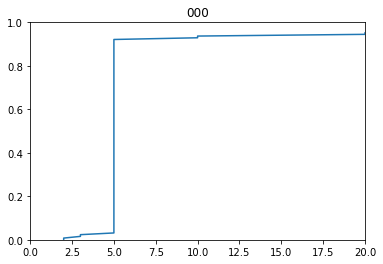

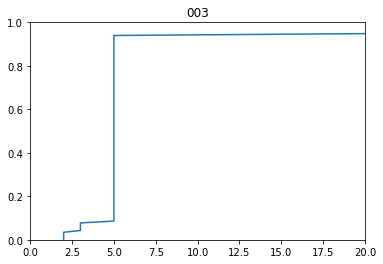

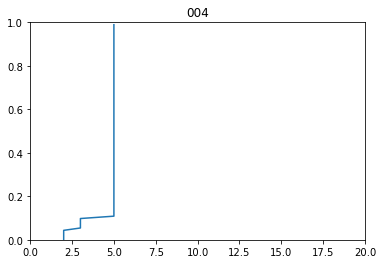

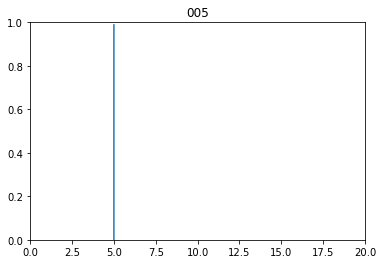

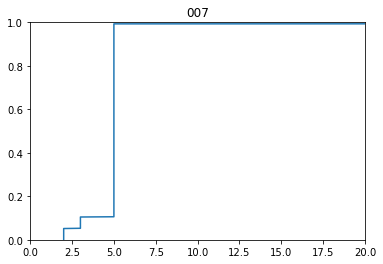

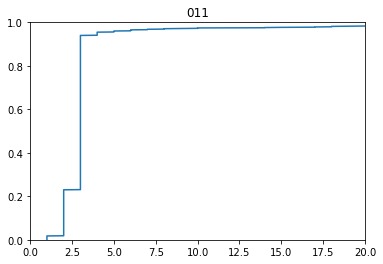

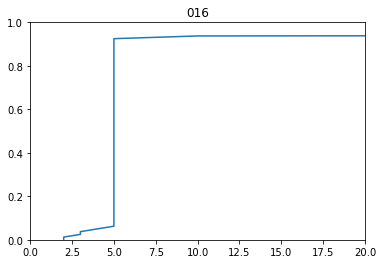

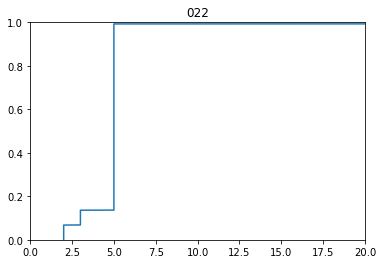

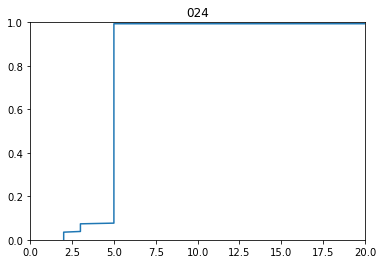

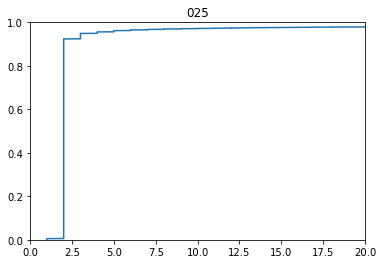

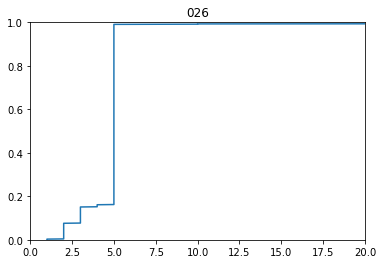

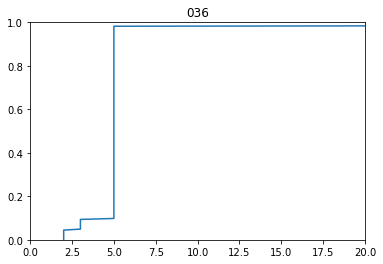

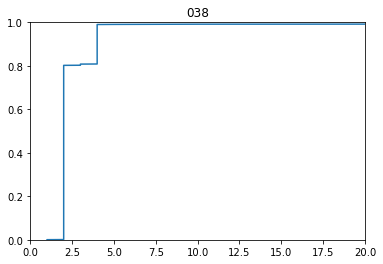

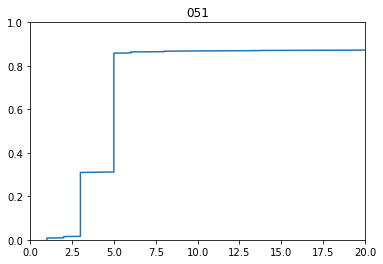

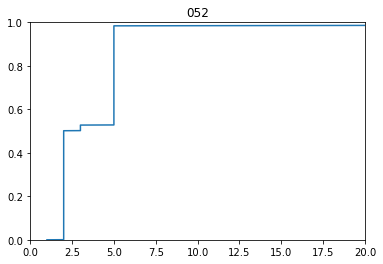

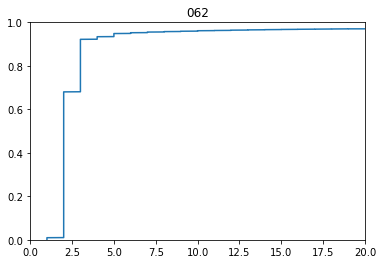

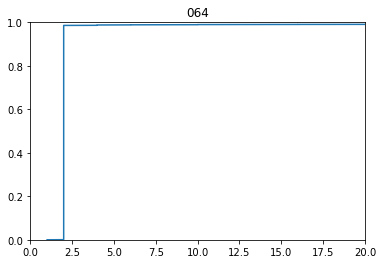

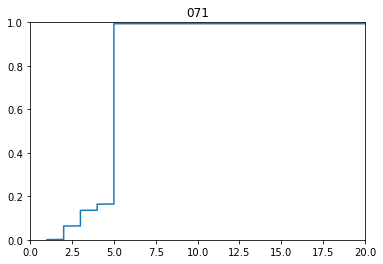

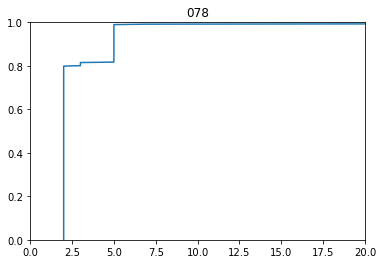

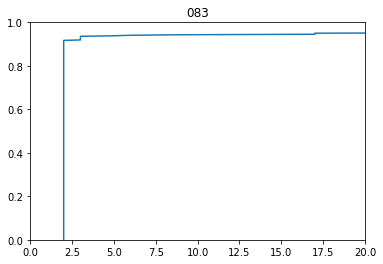

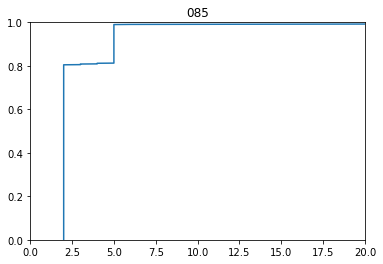

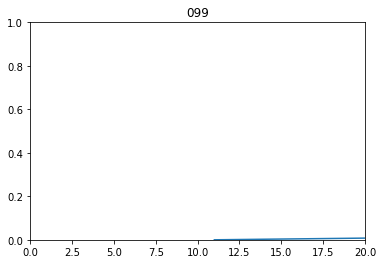

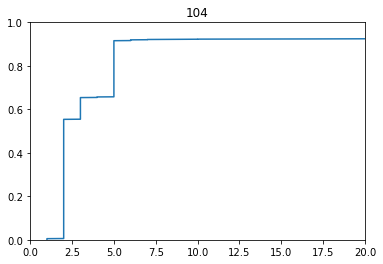

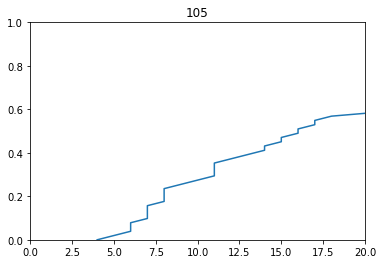

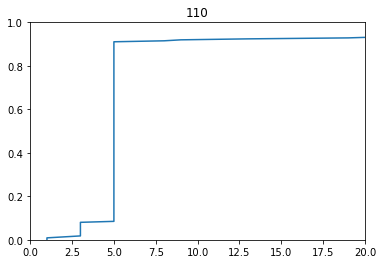

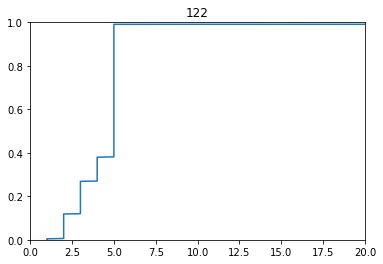

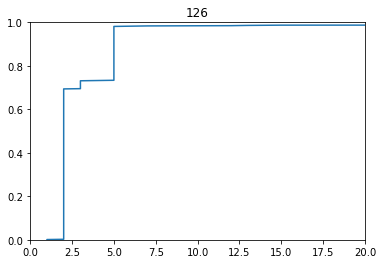

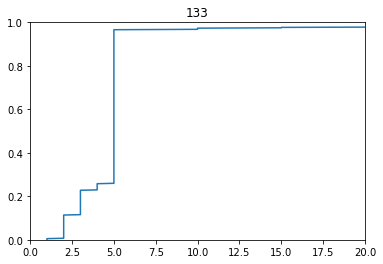

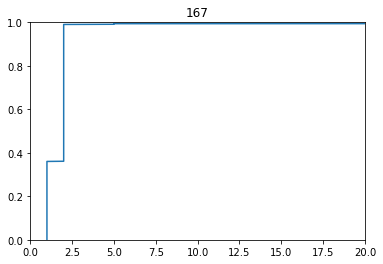

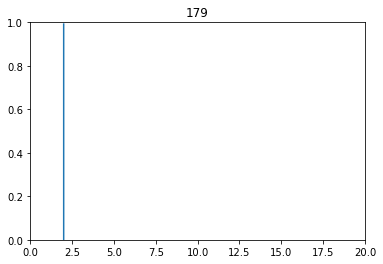

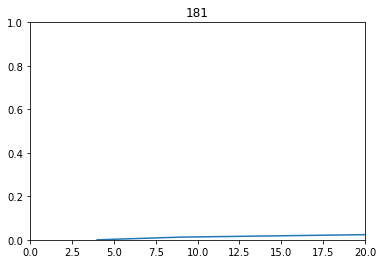

In [6]:
for person_id in big_dict:
    time_steps = np.sort(big_dict[person_id].ds.dropna())
    proportion = np.array(range(len(time_steps)))/len(time_steps)
    plt.figure()
    plt.plot(time_steps, proportion)
    plt.xlim([0, 20])
    plt.ylim([0, 1])
    plt.title(person_id)
    plt.show()

In [7]:
print(len(big_dict[person_id]))
np.sum(big_dict[person_id].ds > 10)

82


79

In [8]:
# do segmentation
data = big_dict[person_id][['x','y']].to_numpy()
segs = data.reshape(-1, 1, 2)
segs = np.hstack((segs[:-1], segs[1:]))

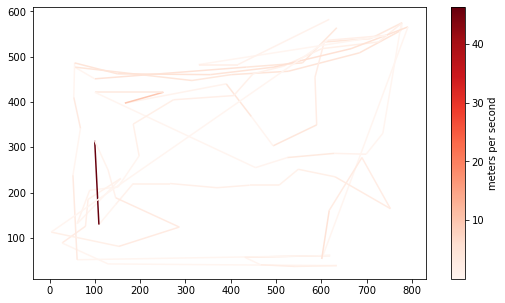

In [9]:
# plot our lines colorized by velocity
plt.figure(figsize=(9, 5))
plt.gca().set_aspect("equal")

coll = LineCollection(segs, cmap=plt.cm.Reds)
coll.set_array(big_dict[person_id]['velocity'].to_numpy()[1:])

plt.gca().add_collection(coll)
plt.gca().autoscale_view()
cbar = plt.colorbar(coll, label='meters per second')
plt.show()

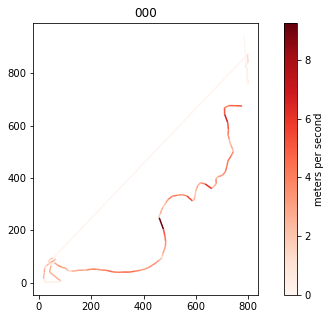

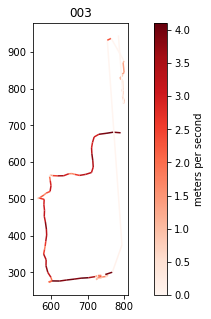

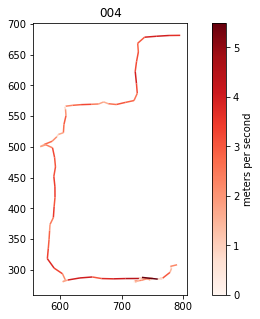

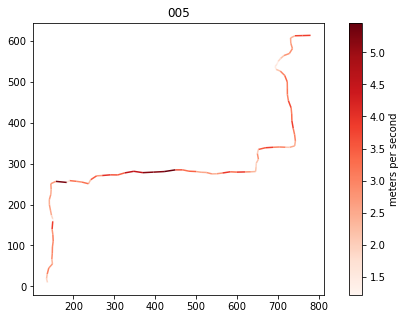

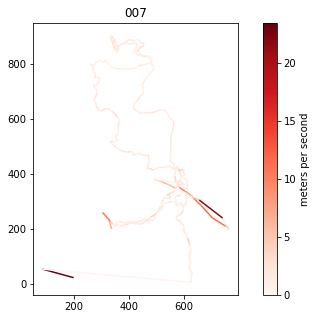

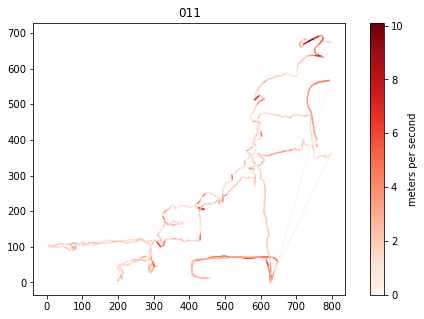

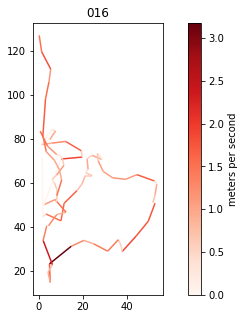

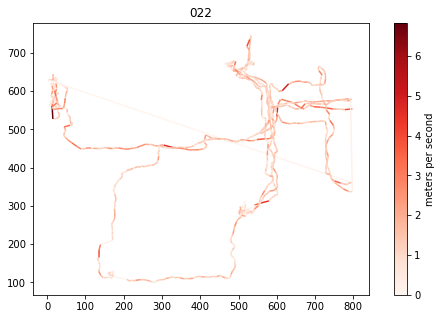

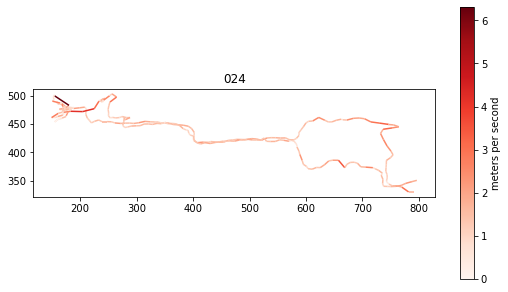

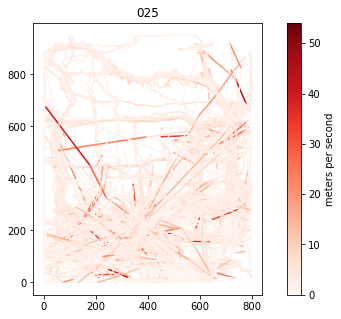

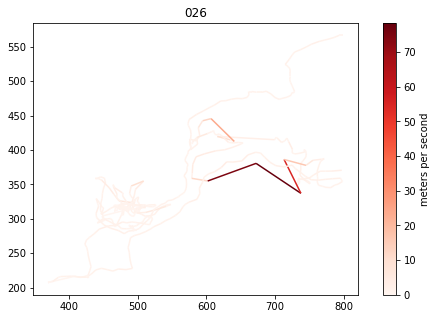

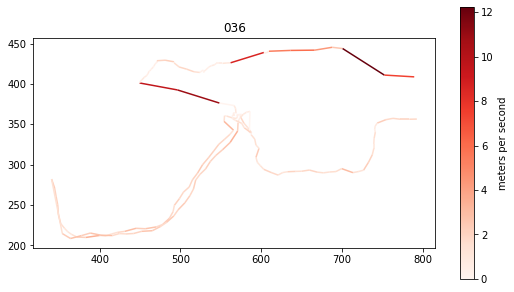

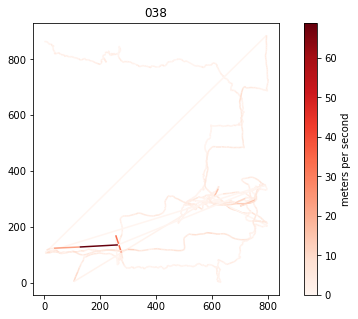

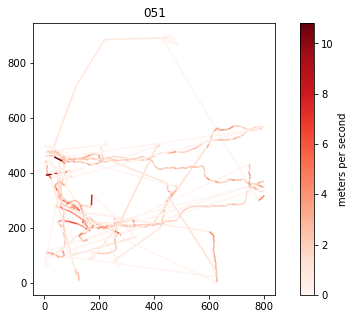

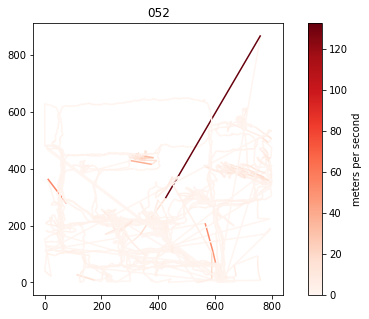

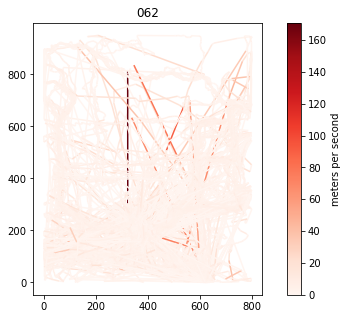

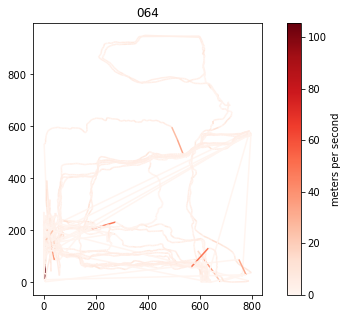

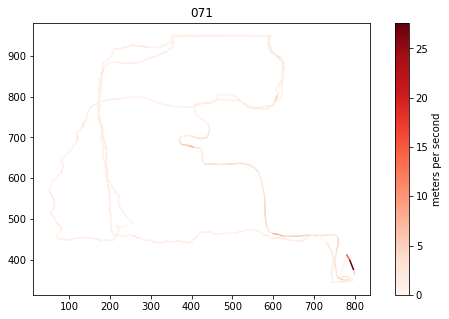

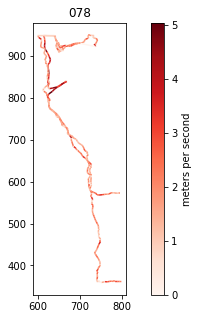

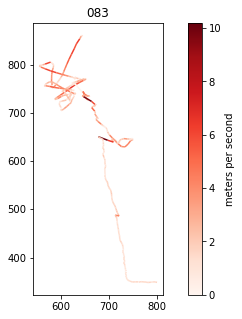

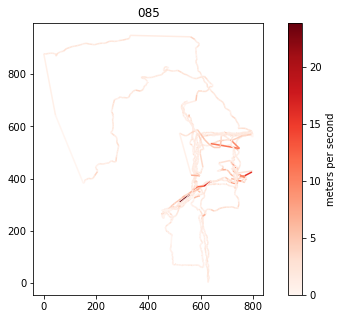

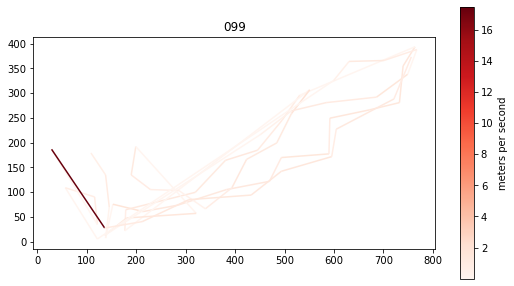

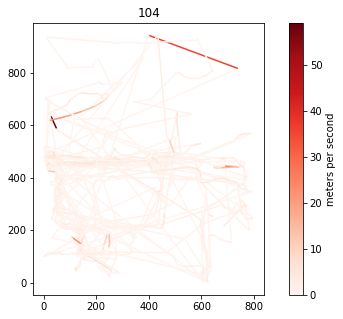

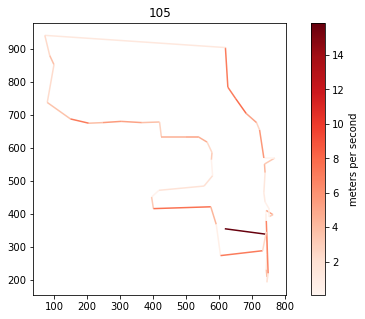

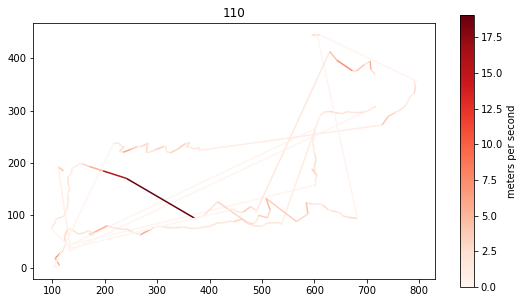

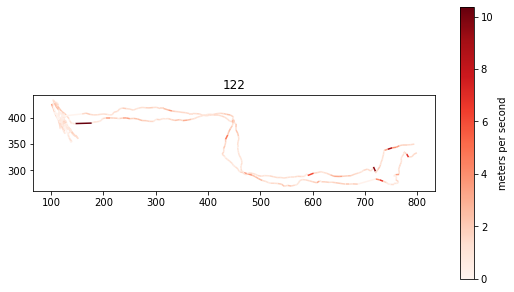

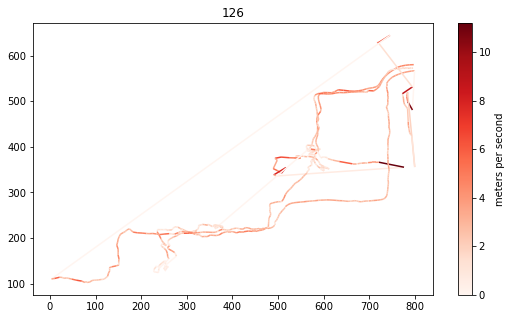

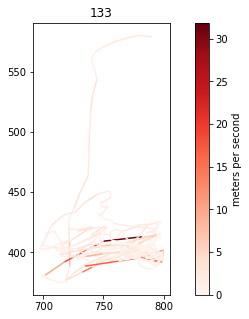

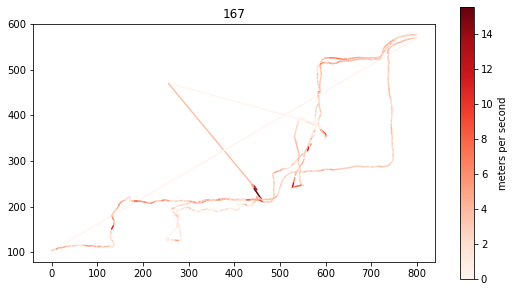

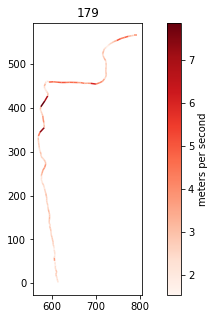

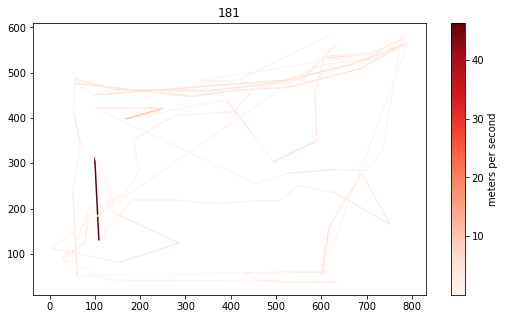

'\n    # store the results \n    segs_list.append(segs)\n    vel_list.append(big_dict[person_id][\'velocity\'].to_numpy()[1:])\n    \nbigsegs = np.concatenate(segs_list, axis=0)\nbigvels = np.concatenate(vel_list, axis=0)\n\n# plot our lines colorized by velocity\nplt.figure(figsize=(18, 10))\nplt.gca().set_aspect("equal")\n\ncoll = LineCollection(bigsegs, cmap=plt.cm.Reds)\ncoll.set_array(bigvels)\n\nplt.gca().add_collection(coll)\nplt.gca().autoscale_view()\ncbar = plt.colorbar(coll, label=\'meters per second\')\nplt.show()\n'

In [10]:
# do it for all the mobility traces
segs_list = []
vel_list = []

for person_id in big_dict:
    # calculate velocities
    big_dict[person_id][['dx', 'dy', 'ds']] = big_dict[person_id].diff()[['x','y', 'seconds']]
    big_dict[person_id]['velocity'] = np.linalg.norm(big_dict[person_id][['dx', 'dy']], axis=1) / big_dict[person_id]['ds']
    
    # do segmentation
    data = big_dict[person_id][['x','y']].to_numpy()
    segs = data.reshape(-1, 1, 2)
    segs = np.hstack((segs[:-1], segs[1:]))

    # plot our lines colorized by velocity
    plt.figure(figsize=(9, 5))
    plt.gca().set_aspect("equal")

    coll = LineCollection(segs, cmap=plt.cm.Reds)
    coll.set_array(big_dict[person_id]['velocity'].to_numpy()[1:])

    plt.gca().add_collection(coll)
    plt.gca().autoscale_view()
    cbar = plt.colorbar(coll, label='meters per second')
    plt.title(person_id)
    plt.show()
    
'''
    # store the results 
    segs_list.append(segs)
    vel_list.append(big_dict[person_id]['velocity'].to_numpy()[1:])
    
bigsegs = np.concatenate(segs_list, axis=0)
bigvels = np.concatenate(vel_list, axis=0)

# plot our lines colorized by velocity
plt.figure(figsize=(18, 10))
plt.gca().set_aspect("equal")

coll = LineCollection(bigsegs, cmap=plt.cm.Reds)
coll.set_array(bigvels)

plt.gca().add_collection(coll)
plt.gca().autoscale_view()
cbar = plt.colorbar(coll, label='meters per second')
plt.show()
'''

## slice and dice

Ok cool now that we have reasonable velocity measurements which are kinda scuffed ish, we can break the things up into contiguous pieces. I think we can just take segments where adjacent measurements are less than 10 seconds apart and contain at least 50 measurements.

In [11]:
sliced_dict = {}
num_pieces = 0
max_ds = 10.0
max_vel = 8.0
min_slice = 50
for person_id in big_dict:
    piece_size = 0
    cur_row = 0
    last_index = 0
    for index, row in big_dict[person_id].iterrows():
        # if the step is too large or too fast, we take a chop here
        if pd.isnull(row.velocity) or row.velocity > max_vel or row.ds > max_ds:
            new_df = big_dict[person_id].iloc[last_index:cur_row]
            last_index = cur_row
            
            # if the slice is large enough, we add it to our dictionary
            if len(new_df) > min_slice:
                sliced_dict[num_pieces] = deepcopy(new_df)
                num_pieces += 1

        cur_row += 1

In [12]:
len(sliced_dict)

1035

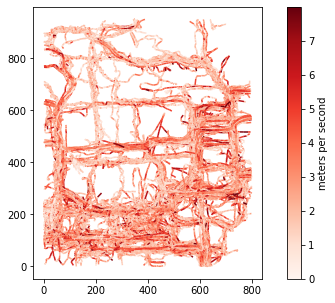

In [13]:
# plot out all the thingos
segs_list = []
vel_list = []

for person_id in sliced_dict:
    # calculate velocities
    sliced_dict[person_id][['dx', 'dy', 'ds']] = sliced_dict[person_id].diff()[['x','y', 'seconds']]
    sliced_dict[person_id]['velocity'] = np.linalg.norm(sliced_dict[person_id][['dx', 'dy']], axis=1) / sliced_dict[person_id]['ds']
    
    #if np.max(sliced_dict[person_id].velocity) > max_vel:
    #    breakpoint()
    
    # do segmentation
    data = sliced_dict[person_id][['x','y']].to_numpy()
    segs = data.reshape(-1, 1, 2)
    segs = np.hstack((segs[:-1], segs[1:]))

    '''
    # plot our lines colorized by velocity
    plt.figure(figsize=(18, 10))
    plt.gca().set_aspect("equal")

    coll = LineCollection(segs, cmap=plt.cm.Reds)
    coll.set_array(big_dict[person_id]['velocity'].to_numpy()[1:])

    plt.gca().add_collection(coll)
    plt.gca().autoscale_view()
    cbar = plt.colorbar(coll, label='meters per second')
    plt.title(person_id)
    plt.show()
    '''
    
    # store the results 
    segs_list.append(segs)
    vel_list.append(sliced_dict[person_id]['velocity'].to_numpy()[1:])
    
bigsegs = np.concatenate(segs_list, axis=0)
bigvels = np.concatenate(vel_list, axis=0)

# plot our lines colorized by velocity
plt.figure(figsize=(9, 5))
plt.gca().set_aspect("equal")

coll = LineCollection(bigsegs, cmap=plt.cm.Reds)
coll.set_array(bigvels)

plt.gca().add_collection(coll)
plt.gca().autoscale_view()
cbar = plt.colorbar(coll, label='meters per second')
plt.show()


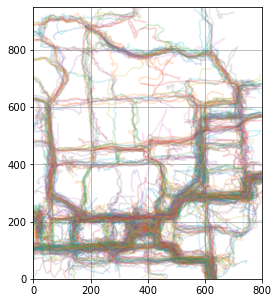

In [14]:
# print out the data really quick
plt.figure(figsize=(9, 5))
plt.xlim([0,800])
plt.ylim([0,950])
plt.grid()
plt.gca().set_aspect("equal")
for person_id in sliced_dict:
    plt.plot(sliced_dict[person_id]["x"], sliced_dict[person_id]["y"], alpha=0.2)
plt.show()

In [15]:
# pickle our dictionary so we don't have to reconstruct it again
# in the future when we realize we messed something up
import pickle

save_path = "../ground_truth/sliced_dict.pkl"
with open(save_path, 'wb') as save_file:
    pickle.dump(sliced_dict, save_file)

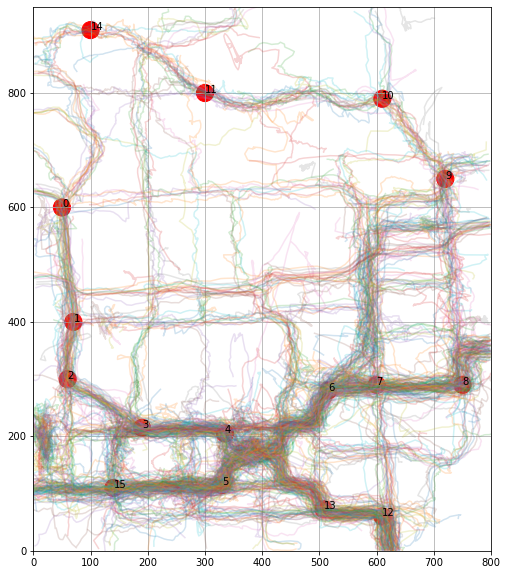

In [16]:
# make some intelligent gateway choices
gateways = np.array([[50, 600],
                     [70, 400],
                     [60,300],
                     [190,215],
                     [335,205],
                     [330,115],
                     [515,280],
                     [600,290],
                     [750,290],
                     [720,650],
                     [610,790],
                     [300,800],
                     [610,60],
                     [507,73],
                     [100,910],
                     [140,110]])
radius = 15

plt.figure(figsize=(18, 10))
plt.xlim([0,800])
plt.ylim([0,950])
plt.grid()
plt.gca().set_aspect("equal")
for person_id in sliced_dict:
    plt.plot(sliced_dict[person_id]["x"], sliced_dict[person_id]["y"], alpha=0.2)
for index, row in enumerate(gateways):
    plt.gca().add_patch(plt.Circle(row, radius, color='r'))
    plt.text(row[0], row[1], index)
plt.show()

## Generate interaction data

In [17]:
# load in previously generated gateways
save_path = "../smol_truth/sensors.csv"
gateway_df = pd.read_csv(save_path)
gateway_df = gateway_df.rename(columns={"sensor ID":"id", "x (m)": "x", "y (m)": "y", "radius (m)":"r"})

In [18]:
compromised = {"id":[60+i for i in range(16)], "x": gateways[:,0], "y": gateways[:,1], "r": np.random.uniform(low=10.0, high=20.0, size=16)}
comp_df = pd.DataFrame(compromised)

In [19]:
gateway_df = pd.concat([gateway_df, comp_df])

In [20]:
gateway_df.to_csv("../ground_truth/gateways.csv")

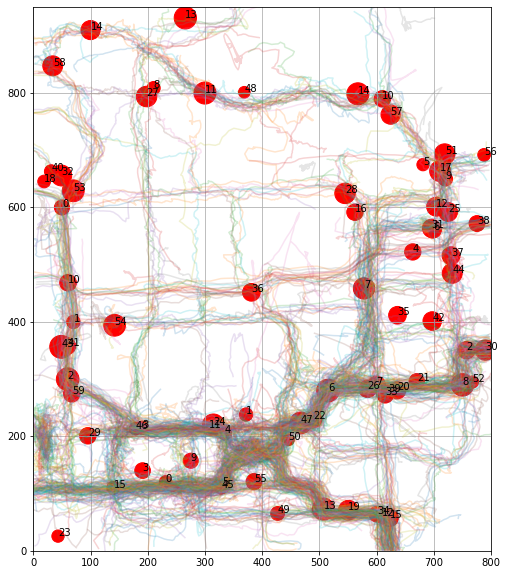

In [21]:
plt.figure(figsize=(18, 10))
plt.xlim([0,800])
plt.ylim([0,950])
plt.grid()
plt.gca().set_aspect("equal")
for person_id in sliced_dict:
    plt.plot(sliced_dict[person_id]["x"], sliced_dict[person_id]["y"], alpha=0.2)
for index, row in gateway_df.iterrows():
    plt.gca().add_patch(plt.Circle(row[['x','y']], row['r'], color='r'))
    plt.text(row['x'], row['y'], index)
plt.show()

In [22]:
# copied from Simulation Data in smol_geolife.ipynb

# Import libraries.
import pickle
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d 


# Load sensor and gateway data from file.
dict_path = "../ground_truth/sliced_dict.pkl"
with open(dict_path, 'rb') as dict_file:
    smol_dict = pickle.load(dict_file)

sensor_path = "../ground_truth/gateways.csv"
with open(sensor_path) as sensor_file:
    sensors = pd.read_csv(sensor_file)

    
# Calculate the interactions between sensors and gateways.
sensor_radii = sensors['r'].to_numpy()
sensor_points = np.vstack([sensors['x'], sensors['y']]).T

for person_id in smol_dict:
    save_path = "../ground_truth/interactions/{}.csv".format(person_id)
    s = smol_dict[person_id]['seconds'].to_numpy()
    fx = interp1d(s, smol_dict[person_id]["x"].to_numpy())
    fy = interp1d(s, smol_dict[person_id]["y"].to_numpy())
    ft = interp1d(s, smol_dict[person_id]["time"].to_numpy())
    
    # Take samples every 0.7 seconds.
    num_samples = int((s[-1]-s[0]) / 0.7)
    s_int = np.linspace(s[0], s[-1], num=num_samples, endpoint=True)
    pos_int = np.vstack([fx(s_int), fy(s_int)]).T
    t_int = ft(s_int)
    
    with open(save_path, 'w') as save_file:
        save_file.write('id,seconds,time\n')
        for i in range(num_samples):
            close_sensors = np.argwhere(np.linalg.norm(sensor_points - pos_int[i], axis=1) < sensor_radii)
            for s_id in close_sensors:
                save_file.write("{},{},{}\n".format(s_id[0], s_int[i], t_int[i]))
                

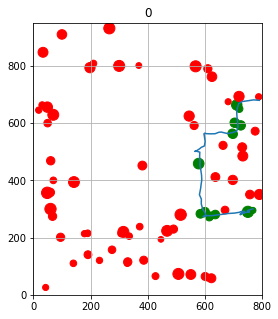

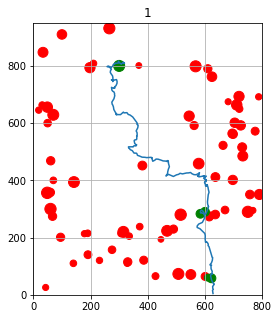

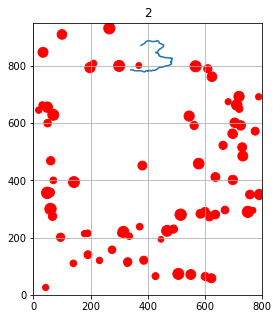

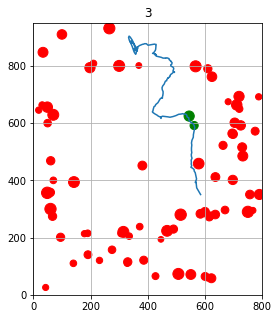

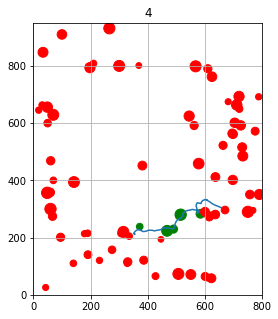

In [23]:

sensor_path = "../ground_truth/gateways.csv"
with open(sensor_path) as sensor_file:
    gdf = pd.read_csv(sensor_file)

for person_id in range(5):
    #person_id = 0
    interaction_path = "../ground_truth/interactions/{}.csv".format(person_id)
    with open(interaction_path) as ifile:
        idf = pd.read_csv(ifile)

    plt.figure(figsize=(9, 5))
    plt.xlim([0,800])
    plt.ylim([0,950])
    plt.grid()
    plt.gca().set_aspect("equal")
    plt.title('{}'.format(person_id))
    plt.plot(sliced_dict[person_id]["x"], sliced_dict[person_id]["y"])

    seen_sensors = idf.id.unique()
    for index, row in gateway_df.iterrows():
        if row['id'] in seen_sensors:
            plt.gca().add_patch(plt.Circle(row[['x','y']], row['r'], color='g'))
        else:
            plt.gca().add_patch(plt.Circle(row[['x','y']], row['r'], color='r'))
        #plt.text(row['x'], row['y'], row['id'])
    '''
    for index in :
        plt.gca().add_patch(plt.Circle(gdf[['x','y']].iloc[index], gdf['r'].iloc[index], color='r'))
        plt.text(gdf['x'].iloc[index], gdf['y'].iloc[index], index)
    '''
    plt.show()

In [25]:
# save mule positions and times
for person_id in sliced_dict:
    save_path = "../ground_truth/mules/{}.csv".format(person_id)
    with open(save_path, 'w') as save_file:
        save_file.write('x,y,seconds,time\n')
        for x, y, norm_secs, time in zip(sliced_dict[person_id]['x'],
                                         sliced_dict[person_id]['y'],
                                         sliced_dict[person_id]['seconds'],
                                         sliced_dict[person_id]['time']):
            save_file.write('{},{},{},{}\n'.format(x, y, norm_secs, time))
